In [1]:
import convexgating as cg
import scanpy as sc
import anndata as ann
import numpy as np
import pandas as pd
#sc.logging.print_header()
file_path = '/work/users/mh823zote/projects/gating/data/CITEseq_Covid/' 
data_dir = file_path + 'data/' 
adata = sc.read_h5ad(data_dir + 'pdata_CD16_CD4_sub_denoised.h5ad')
import json

# CITEseq

In [2]:
base = '/work/users/mh823zote/projects/gating/data/'
AB_citeseq_loc = 'CITEseq_Covid/data/06_intersect_AB_citeseq.json'
base + AB_citeseq_loc

'/work/users/mh823zote/projects/gating/data/CITEseq_Covid/data/06_intersect_AB_citeseq.json'

In [3]:
AB_citeseq_orig = list(adata.var.index)
AB_citeseq = list(adata.var.index)
prefix_to_remove = 'AB_'
for i in range(len(AB_citeseq)):
    if AB_citeseq[i].startswith(prefix_to_remove):
        AB_citeseq[i] = AB_citeseq[i][len(prefix_to_remove):]

# CyTOF

In [4]:
import convexgating as cg
import scanpy as sc
import anndata as ann
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import datetime
import os
import re

def get_subsample_fraction(adata,cluster_string,target_cluster,subsample_factor):
    adata_target = adata[adata.obs[cluster_string] == target_cluster]
    adata_rest = adata[adata.obs[cluster_string] != target_cluster]
    sc.pp.subsample(adata_rest,n_obs = 15*len(adata_target))
    adata_sub = adata_rest.concatenate(adata_target)
    return adata_sub

sc.logging.print_versions()
sc.settings.verbosity = 3 
now = datetime.datetime.now()
today = now.strftime("%Y%m%d")

df_anno = pd.read_csv('/work/users/mh823zote/projects/gating/data/covid/data_Tcells_annotated.csv')
var_names = ['CD45',
       'CD3', 'CD19', 'CD15', 'CD8', 'TCRgd', 'CD62L', 'CD45RO', 'CD28',
       'CD27', 'CD226', 'ICOS', 'PD1', 'Lag3', 'TIGIT', 'CD96', 'CD25', 'CD56',
       'HLADR', 'CD38', 'CD137', 'CD69', 'Ki67', 'CXCR3', 'CXCR5', 'CCR6',
       'CRTH2', 'KLRB1', 'KLRG1', 'KLRF1', 'CD95', 'CD10', 'CD16', 'CD34',
       'CD123', 'CD11c', 'CD21', 'CD14', 'IgD', 'IgM']
adata_anno = ann.AnnData(X=df_anno[var_names], obs= df_anno[['cellid', 'Run', 'FCS.Filename', 'id', 'Individuals', 'Group',
       'Severity', 'Disease.phase', 'max. WHO scale', 'sev_merge',
       'Days.post.symptom.onset', 'Week', 'sev_week', 'followup', 'Tcellcompartment',
       'pheno_acute', 'metacluster_num', 'metacluster_name', 'new_clust_name',
       'new_clust_num']]) 

df_umap = df_anno[['UMAP1', 'UMAP2']]
df_umap.index = adata_anno.obs_names
adata_anno.obsm['X_umap'] = df_umap.to_numpy()

cofactor = 5
adata_anno.X = adata_anno.X/cofactor
adata_anno.X = np.arcsinh(adata_anno.X)

#----------------------------------------------------------------------------------------
adata_CV19 = adata_anno[adata_anno.obs['Group'] == 'CV19']
AB_cytof = list(adata_CV19.var.index)

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                         9.2.0
asttokens                   NA
backcall                    0.2.0
cffi                        1.15.0
colorama                    0.4.4
convexgating                NA
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
defusedxml                  0.7.1
entrypoints                 0.4
executing                   0.8.2
google                      NA
h5py                        3.7.0
igraph                      0.9.11
ipykernel                   6.9.0
ipython_genutils            0.2.0
ipywidgets                  7.6.5
jedi                        0.18.1
joblib                      1.1.0
kiwisolver                  1.4.4
llvmlite                    0.39.0
louvain                     0.7.1
matplotlib                  3.5.2
mpl_toolkits                NA
natsort                     8.1.0
numba       

# FACS

In [5]:
AB_FACS = ['CD56', 'CD3', 'CD11c', 'Siglec8', 'CEACAM8', 'CD14', 'CD203c', 'CD1c','CD19', 'HLA-DR', 'CD4', 'LD', 'CD16', 'CD45', 'CD8']
#AB_FACS = ['CD56', 'CD3', 'CD11c', 'Siglec8', 'CD66b', 'CD14', 'CD203c', 'CD1c','CD19', 'HLA-DR', 'CD4', 'LD', 'CD16', 'CD45', 'CD8']

# Intersection

In [6]:
print('FACS    : ' + str(AB_FACS))
print('CITEseq : ' +str(AB_citeseq))
print('CyTOF   : '+ str(AB_cytof))

FACS    : ['CD56', 'CD3', 'CD11c', 'Siglec8', 'CEACAM8', 'CD14', 'CD203c', 'CD1c', 'CD19', 'HLA-DR', 'CD4', 'LD', 'CD16', 'CD45', 'CD8']
CITEseq : ['CD80', 'CD86', 'CD274', 'PDCD1LG2', 'ICOSLG', 'ITGAM', 'OX40L', 'TNFSF9', 'PVR', 'NECTIN2', 'CD47', 'CD70', 'TNFRSF8', 'CD40', 'CD40LG', 'CD52', 'CD3', 'CD8', 'CD56', 'CD19', 'CD33', 'ITGAX', 'CD34', 'TNFRSF17', 'HLA-ABC', 'THY1', 'KIT', 'MME', 'CD45RA', 'CD123', 'CD7', 'ITGA6', 'CCR4', 'CD4', 'CD44', 'CD14', 'CD16', 'CD25', 'CD45RO', 'PD1', 'TIGIT', 'Mouse IgG1_K_Iso', 'Mouse_IgG2a_K_Iso', 'Mouse_IgG2b_K_Iso', 'Rat_IgG2b_K_Iso', 'CD20', 'NCR1', 'PTGDR2', 'EPCAM', 'PECAM1', 'podoplanin', 'MCAM', 'CDH1', 'IgM', 'CD5', 'TCRg_d', 'CXCR3', 'CCR5', 'FCGR2A', 'CCR6', 'CXCR5', 'ITGAE', 'CD69', 'CD62L', 'CCR7', 'CD161', 'CTLA4', 'LAG3', 'KLRG1', 'CD27', 'LAMP1', 'FAS', 'HLA-DR', 'CD1C', 'CD64', 'CD141', 'CD1d', 'KLRK1', 'CEACAM8', 'CR1', 'B3GAT1', 'HAVCR2', 'BTLA', 'ICOS', 'CD58', 'CD96', 'ENTPD1', 'FASLG', 'CX3CR1', 'CD24', 'CD21', 'ITGAL', 'IgA'

### FACS - citeseq 

In [ ]:
#rename CEACAM8 in CD66b

In [7]:
intersect_FACS_citeseq = list(set(AB_FACS) & set(AB_citeseq))

In [11]:
intersect_FACS_citeseq_AB = ['AB_' + item for item in intersect_FACS_citeseq]

In [16]:
with open('07_intersect_AB_citeseq_FACS.json', 'w') as f:
    json.dump(intersect_FACS_citeseq_AB , f)

### FACS - cytof 

In [8]:
intersect_FACS_cytof = list(set(AB_FACS) & set(AB_cytof))

In [19]:
with open('07_intersect_AB_cytof_FACS.json', 'w') as f:
    json.dump(intersect_FACS_cytof, f)

In [20]:
intersect_FACS_citeseq_AB

['AB_CD3',
 'AB_HLA-DR',
 'AB_CD16',
 'AB_CD19',
 'AB_CD14',
 'AB_CD45',
 'AB_CD8',
 'AB_CEACAM8',
 'AB_CD56',
 'AB_CD4']

In [11]:
intersect_FACS_citeseq

['CD16',
 'HLA-DR',
 'CD56',
 'CD19',
 'CEACAM8',
 'CD14',
 'CD3',
 'CD45',
 'CD4',
 'CD8']

In [9]:
intersect_FACS_cytof

['CD16', 'CD56', 'CD11c', 'CD19', 'CD14', 'CD3', 'CD45', 'CD8']

### cytof - citeseq

In [12]:
intersect_citeseq_cytof = list(set(AB_citeseq) & set(AB_cytof))

# Visualization

In [13]:
from matplotlib_venn import venn2
from matplotlib_venn import venn2_circles

In [14]:
from matplotlib_venn import venn3
from matplotlib_venn import venn3_circles

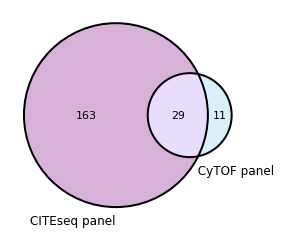

In [35]:
out = venn2([set(AB_citeseq), set(AB_cytof)],set_labels = ('CITEseq panel', '  CyTOF panel'), alpha = 0.3,set_colors=('purple', 'skyblue'))
venn2_circles([set(AB_citeseq), set(AB_cytof)])
for text in out.set_labels:
    text.set_fontsize(12)
for x in range(len(out.subset_labels)):
    if out.subset_labels[x] is not None:
        out.subset_labels[x].set_fontsize(11)
plt.savefig(base + 'CITEseq_Covid/figures/07_venn_CITEseq_vs_CyTOF.pdf')

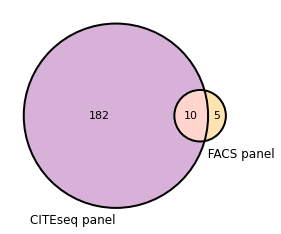

In [36]:
out = venn2([set(AB_citeseq), set(AB_FACS)],set_labels = ('CITEseq panel', '  FACS panel'), alpha = 0.3,set_colors=('purple', 'orange'))
venn2_circles([set(AB_citeseq), set(AB_FACS)])
for text in out.set_labels:
    text.set_fontsize(12)
for x in range(len(out.subset_labels)):
    if out.subset_labels[x] is not None:
        out.subset_labels[x].set_fontsize(11)
plt.savefig(base + 'CITEseq_Covid/figures/07_venn_CITEseq_vs_FACS.pdf')

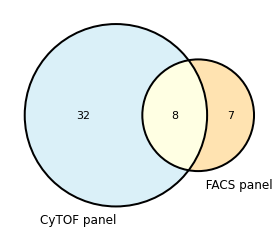

In [37]:
out = venn2([set(AB_cytof), set(AB_FACS)],set_labels = ('CyTOF panel', '  FACS panel'), alpha = 0.3,set_colors=('skyblue', 'orange'))
venn2_circles([set(AB_cytof), set(AB_FACS)])
for text in out.set_labels:
    text.set_fontsize(12)
for x in range(len(out.subset_labels)):
    if out.subset_labels[x] is not None:
        out.subset_labels[x].set_fontsize(11)
plt.savefig(base + 'CITEseq_Covid/figures/07_venn_CyTOF_vs_FACS.pdf')

In [40]:
AB_FACS_min = ['CD3','CD4','CD8','CD16']

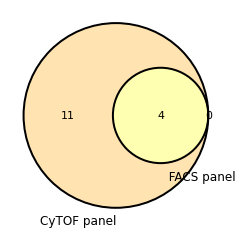

In [58]:
out = venn2([set(AB_FACS), set(AB_FACS_min)],set_labels = ('CyTOF panel', '  FACS panel'), alpha = 0.3,set_colors=('orange','yellow' ))
venn2_circles([set(AB_FACS), set(AB_FACS_min)])
for text in out.set_labels:
    text.set_fontsize(12)
for x in range(len(out.subset_labels)):
    if out.subset_labels[x] is not None:
        out.subset_labels[x].set_fontsize(11)
plt.savefig(base + 'CITEseq_Covid/figures/07_venn_FACS_vs_FACS_min.pdf')

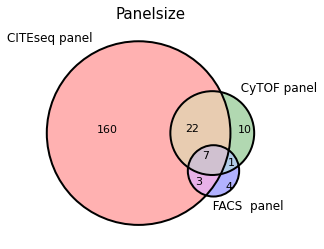

In [83]:
out = venn3([set(AB_citeseq), set(AB_cytof),set(AB_FACS)],set_labels = ('CITEseq panel', '  CyTOF panel','                  FACS  panel'), alpha = 0.3)
venn3_circles([set(AB_citeseq), set(AB_cytof),set(AB_FACS)])
for text in out.set_labels:
    text.set_fontsize(12)
for x in range(len(out.subset_labels)):
    if out.subset_labels[x] is not None:
        out.subset_labels[x].set_fontsize(11)
plt.title('Panelsize',fontsize = 15)
plt.savefig(base + 'CITEseq_Covid/figures/07_venn_diagram_panelsize.pdf')

Text(0.5, 1.0, 'Panelsize')

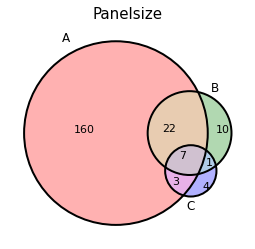

In [84]:
out = venn3([set(AB_citeseq), set(AB_cytof),set(AB_FACS)], alpha = 0.3)
venn3_circles([set(AB_citeseq), set(AB_cytof),set(AB_FACS)])
for text in out.set_labels:
    text.set_fontsize(12)
for x in range(len(out.subset_labels)):
    if out.subset_labels[x] is not None:
        out.subset_labels[x].set_fontsize(11)
plt.title('Panelsize',fontsize = 15)